## questions:    
1. Are there more accendants in warmer or colder areas?
2. Which states have the highest number of accidents? and which cities?
3. In which weather condition do most of accidents  occur?
4. what is the time of the day are accidents most frequent in? and what is the day of the week?
5. which months have the most accidents?
6. Are accidents increasing or decreasing year over year?(trend of accidents)
7. How does each feature relate to the target variable?(the correlation between them)
8.  Which feature affects the target value the most?

***note that ' NewYork' city is not included in this dataset***

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hendemad
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:06<00:00, 18.1MB/s]


In [ ]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparation and Cleaning:
1. Load the file using pandas.
2. Look at come information about the data and the columns.
3. Fix any missing ot incorrect values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
#Checking if there are any duplicated values
df.duplicated().sum()

0

In [ ]:
# Finding no.of numeric columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = df.select_dtypes(include=numerics)
len(numeric_data.columns)

14

In [ ]:
missing_values = df.isnull().sum()
missing_values

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [ ]:
#Finding missing values
missing_percentages = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100
missing_percentages[missing_percentages != 0]

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
dtype: float64

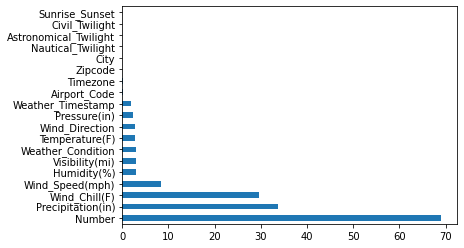

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

In [ ]:
outliers=df[td]<=0
df[outliers] = np.nan
df.dropna(subset=[td],axis=0,inplace=True)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,A-2716600,3.0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Night,2016.0,Feb,8.0,0.0,Mon,360.0
1,A-2716601,2.0,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Night,2016.0,Feb,8.0,5.0,Mon,360.0
2,A-2716602,2.0,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,360.0
3,A-2716603,2.0,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,360.0
4,A-2716604,2.0,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,Night,Day,Day,2016.0,Feb,8.0,6.0,Mon,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2.0,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,2019.0,Aug,23.0,18.0,Fri,29.0
1516060,A-4239403,2.0,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,2019.0,Aug,23.0,19.0,Fri,27.0
1516061,A-4239404,2.0,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,2019.0,Aug,23.0,19.0,Fri,28.0
1516062,A-4239405,2.0,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:

## Data Analyzing

### State column

In [ ]:
states = df['State']
highest_cities = df.State.value_counts().max()
states[highest_cities]

'CA'

So, CA 'California' has the highest no.of accidents

In [ ]:
#what is the problem here?
#fig,ax = plt.subplots(figsize=(16,10))
#sns.barplot(x = df.State.unique() ,y = df.State.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


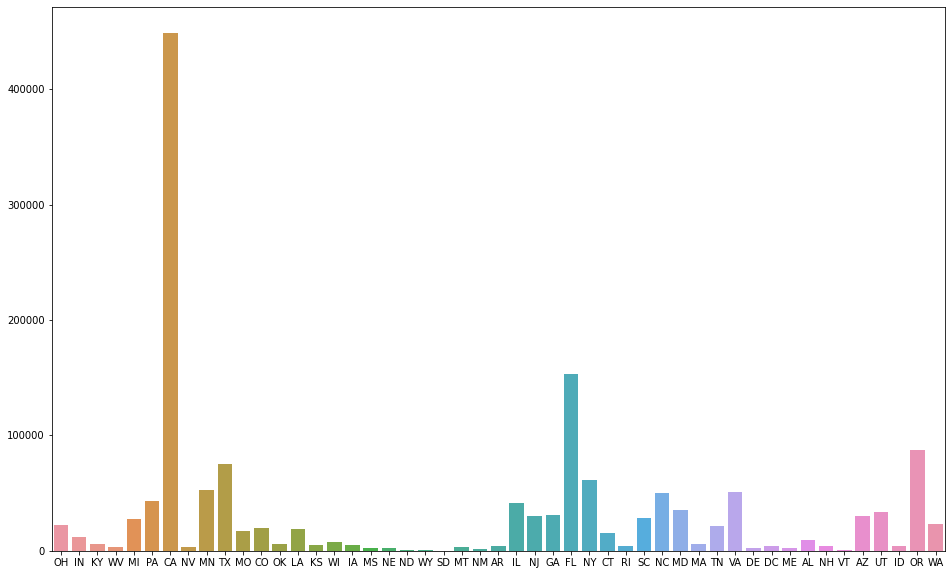

In [ ]:
states = df.State.unique()
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,count_by_state)

In [ ]:
states_accidents = df.State.value_counts()
mean_accidents = states_accidents.mean()
high_accidents_cities = states_accidents[states_accidents> mean_accidents]
len(high_accidents_cities) / len(df.State.unique()) * 100

26.53061224489796

### Cities

In [ ]:
#Finding number of unique cities included in the dataset
citie_s = df['City']
cities = df.City.value_counts().sort_values(ascending = False)
print(cities.head(5))

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64


In [ ]:
len(cities)

10657

In [ ]:
cities.head(1)

Los Angeles    39984
Name: City, dtype: int64

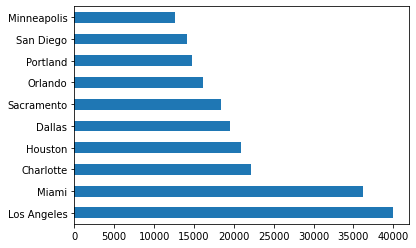

In [ ]:
cities[:10].plot(kind = 'barh')

We can notice that the most accidents occur in Los Angeles

In [ ]:
print(cities[cities == 1])
print('-----------------------')
print(len(cities[cities == 1]))

Placitas         1
Garryowen        1
Blowing Rock     1
Shullsburg       1
Belle Fourche    1
                ..
Grandy           1
Saulsbury        1
Reeds Spring     1
Otter            1
Sandy Level      1
Name: City, Length: 1167, dtype: int64
-----------------------
1167


### Weather

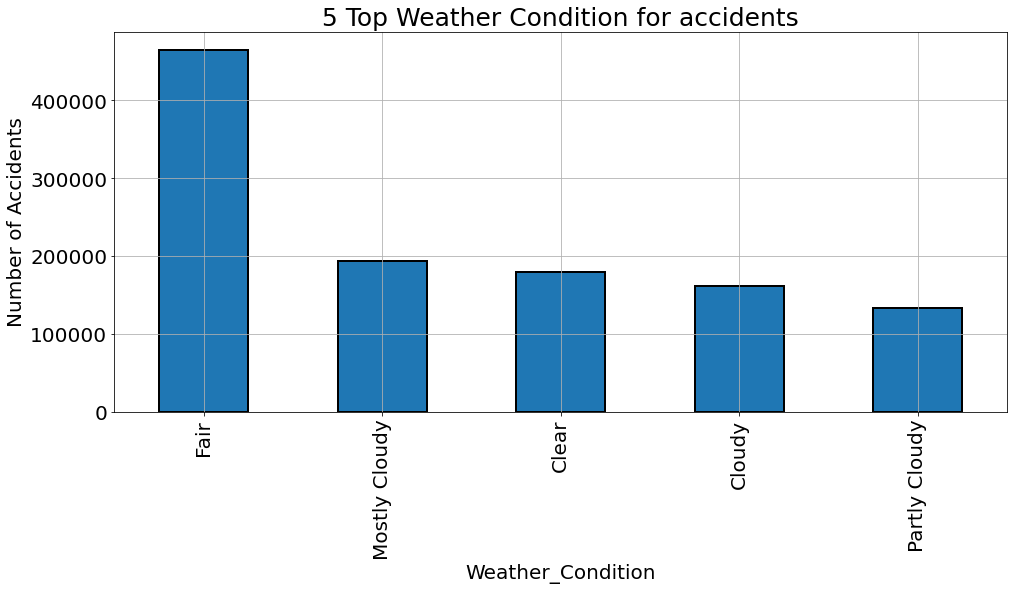

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
df.Weather_Condition.value_counts().sort_values(ascending = False).head(5)

Fair             465252
Mostly Cloudy    193595
Clear            180223
Cloudy           161291
Partly Cloudy    133102
Name: Weather_Condition, dtype: int64

### Start Time

In [ ]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

***1. Hour***

In [ ]:
start_hour = df['Start_Time']
hours = df.Start_Time.dt.hour
hours

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

In [ ]:
hours.value_counts().sort_values(ascending = False)

17    108011
16    105559
15    100074
18     91413
14     90162
13     83700
8      75802
7      73938
12     72283
19     65190
9      59744
6      57859
20     53515
11     51884
10     50442
22     49156
21     48988
23     48226
0      46125
1      43434
5      40105
2      38801
3      32175
4      29478
Name: Start_Time, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


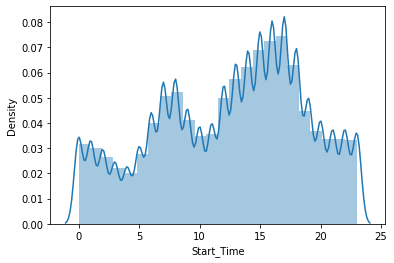

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24)

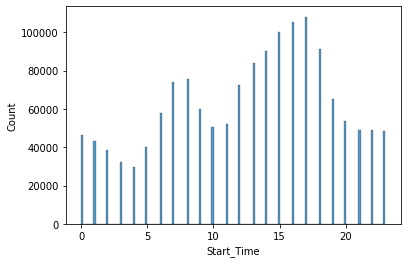

In [ ]:
sns.histplot(df.Start_Time.dt.hour)

***2. Week***

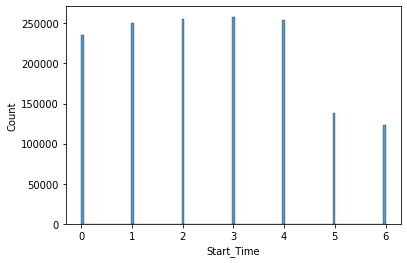

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek)

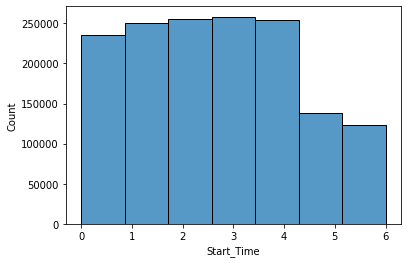

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7)

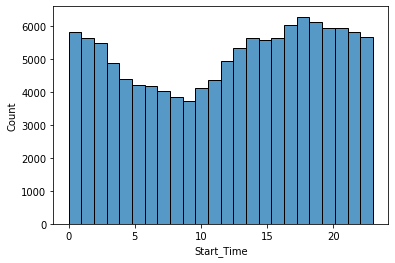

In [ ]:
Sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(Sunday.dt.hour, bins = 24)

In Sunday, The accidents are recorded during the whole day(may be the reason is traffic congestion over the weekend)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


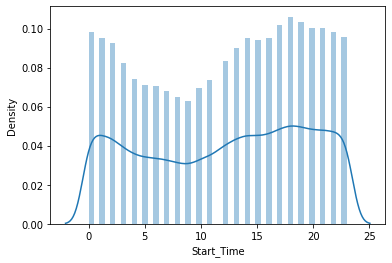

In [ ]:
sns.distplot(Sunday.dt.hour, norm_hist = False)

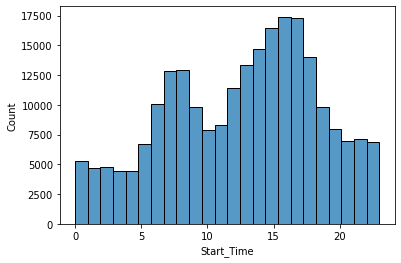

In [ ]:
mondays = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays.dt.hour, bins = 24)

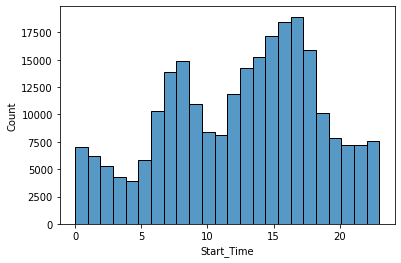

In [ ]:
tuesdays = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
sns.histplot(tuesdays.dt.hour, bins = 24)

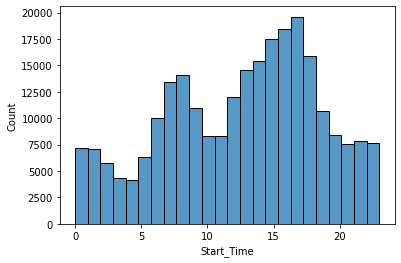

In [ ]:
wednesdays = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.histplot(wednesdays.dt.hour, bins = 24)

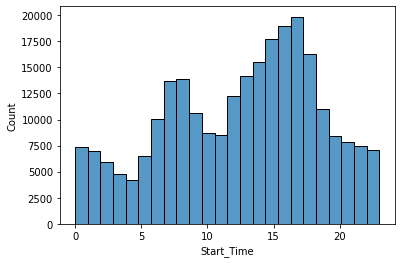

In [ ]:
thursdays = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
sns.histplot(thursdays.dt.hour, bins = 24)

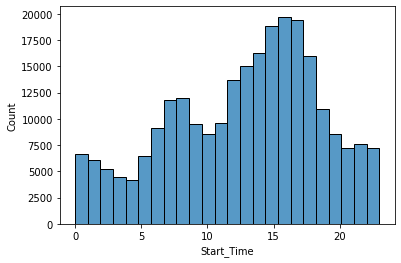

In [ ]:
fridays = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.histplot(fridays.dt.hour, bins = 24)

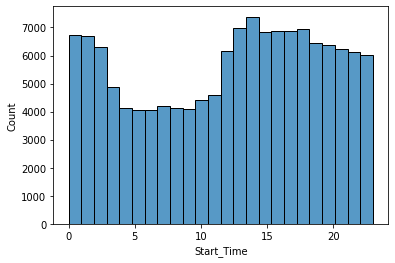

In [ ]:
saturdays = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays.dt.hour, bins = 24)

***3.Year***

In [ ]:
df.Start_Time.dt.year.value_counts()

2020    787932
2019    261772
2017    170099
2018    166936
2016    129325
Name: Start_Time, dtype: int64

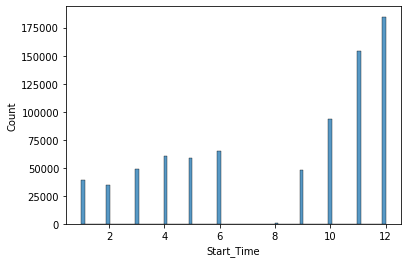

In [ ]:
df_2020 = df.Start_Time[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.dt.month)

It seems that there is a missing data in 2020

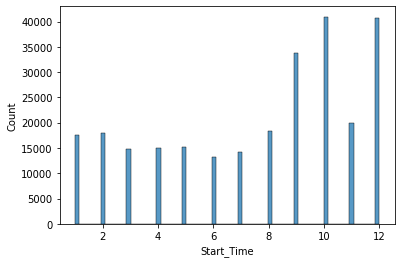

In [ ]:
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]
sns.histplot(df_2019.dt.month)

In 2019, October and December had the highest number of accidents.

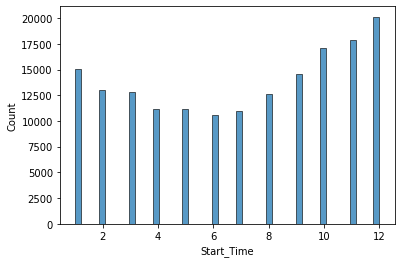

In [ ]:
df_2018 = df.Start_Time[df.Start_Time.dt.year == 2018]
sns.histplot(df_2018.dt.month)

In 2018, October and December still had the heighest number of accidents 

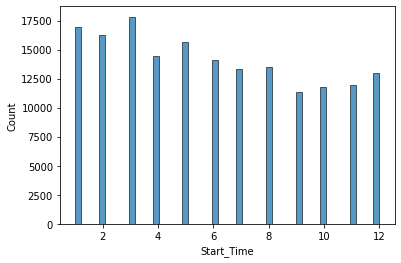

In [ ]:
df_2017 = df.Start_Time[df.Start_Time.dt.year == 2017]
sns.histplot(df_2017.dt.month)

In 2017, January and March had the heighest number of accidents.

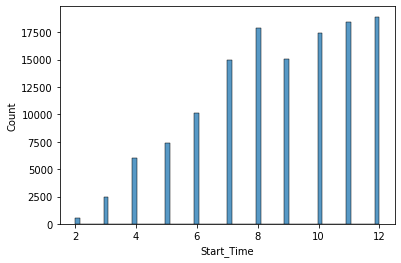

In [ ]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.dt.month)

There is a missing data in 2016, so results is not accurate.

##Start Latitude & Longitude


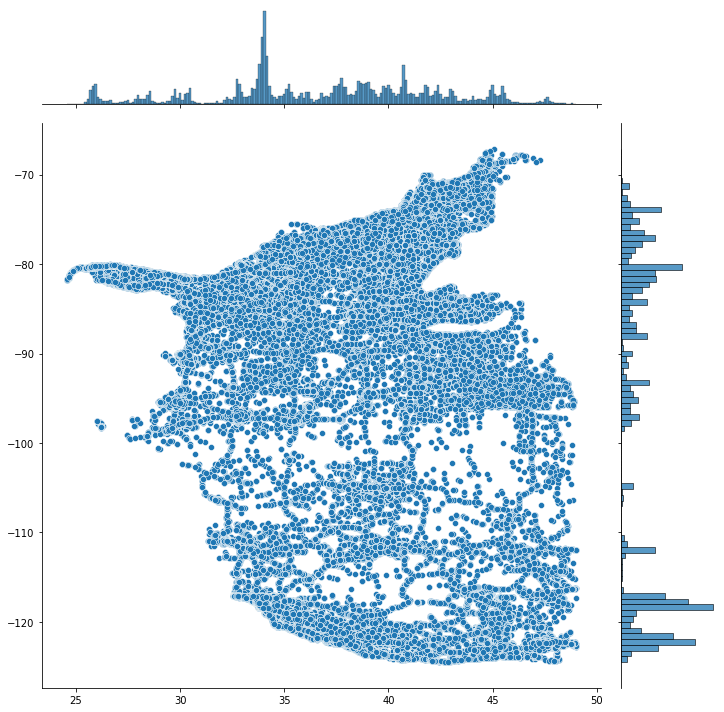

In [ ]:
sns.jointplot(x=df.Start_Lat.values,y=df.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

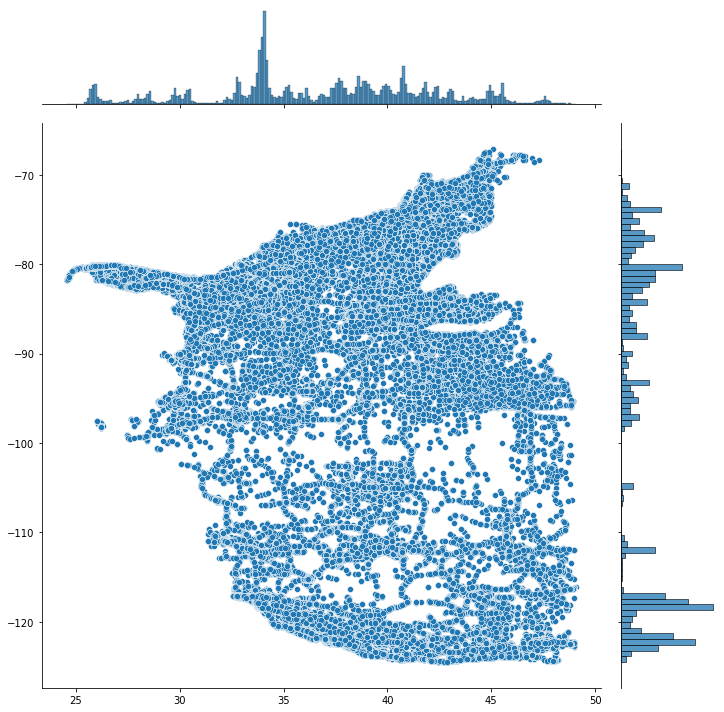

In [ ]:
sns.jointplot(x=df.End_Lat.values,y=df.End_Lng.values,height=10)
plt.ylabel('End_Lat', fontsize=12)
plt.xlabel('End_Lng', fontsize=12)
plt.show()

In [ ]:
import folium
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
zip(list(df.Start_Lat), list(df.Start_Lng))
from folium.plugins import HeatMap
sample_df = df.sample(int(0.001 * len(df)))
lat_lon = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon).add_to(map)
map

## Correlation:
- To find correlation between fearures and the target value, I will divide data's columns according to their types

In [ ]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column type']
dtype_df 

,Count,Column type
0,ID,object
1,Severity,float64
2,Start_Time,datetime64[ns]
3,End_Time,datetime64[ns]
4,Start_Lat,float64
5,Start_Lng,float64
6,End_Lat,float64
7,End_Lng,float64
8,Distance(mi),float64
9,Description,object


In [ ]:
new = dtype_df.groupby('Column type').aggregate('Count')
new_index = new.count()
new_index.reset_index()

,Column type,Count
0,float64,31
1,datetime64[ns],2
2,object,20


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


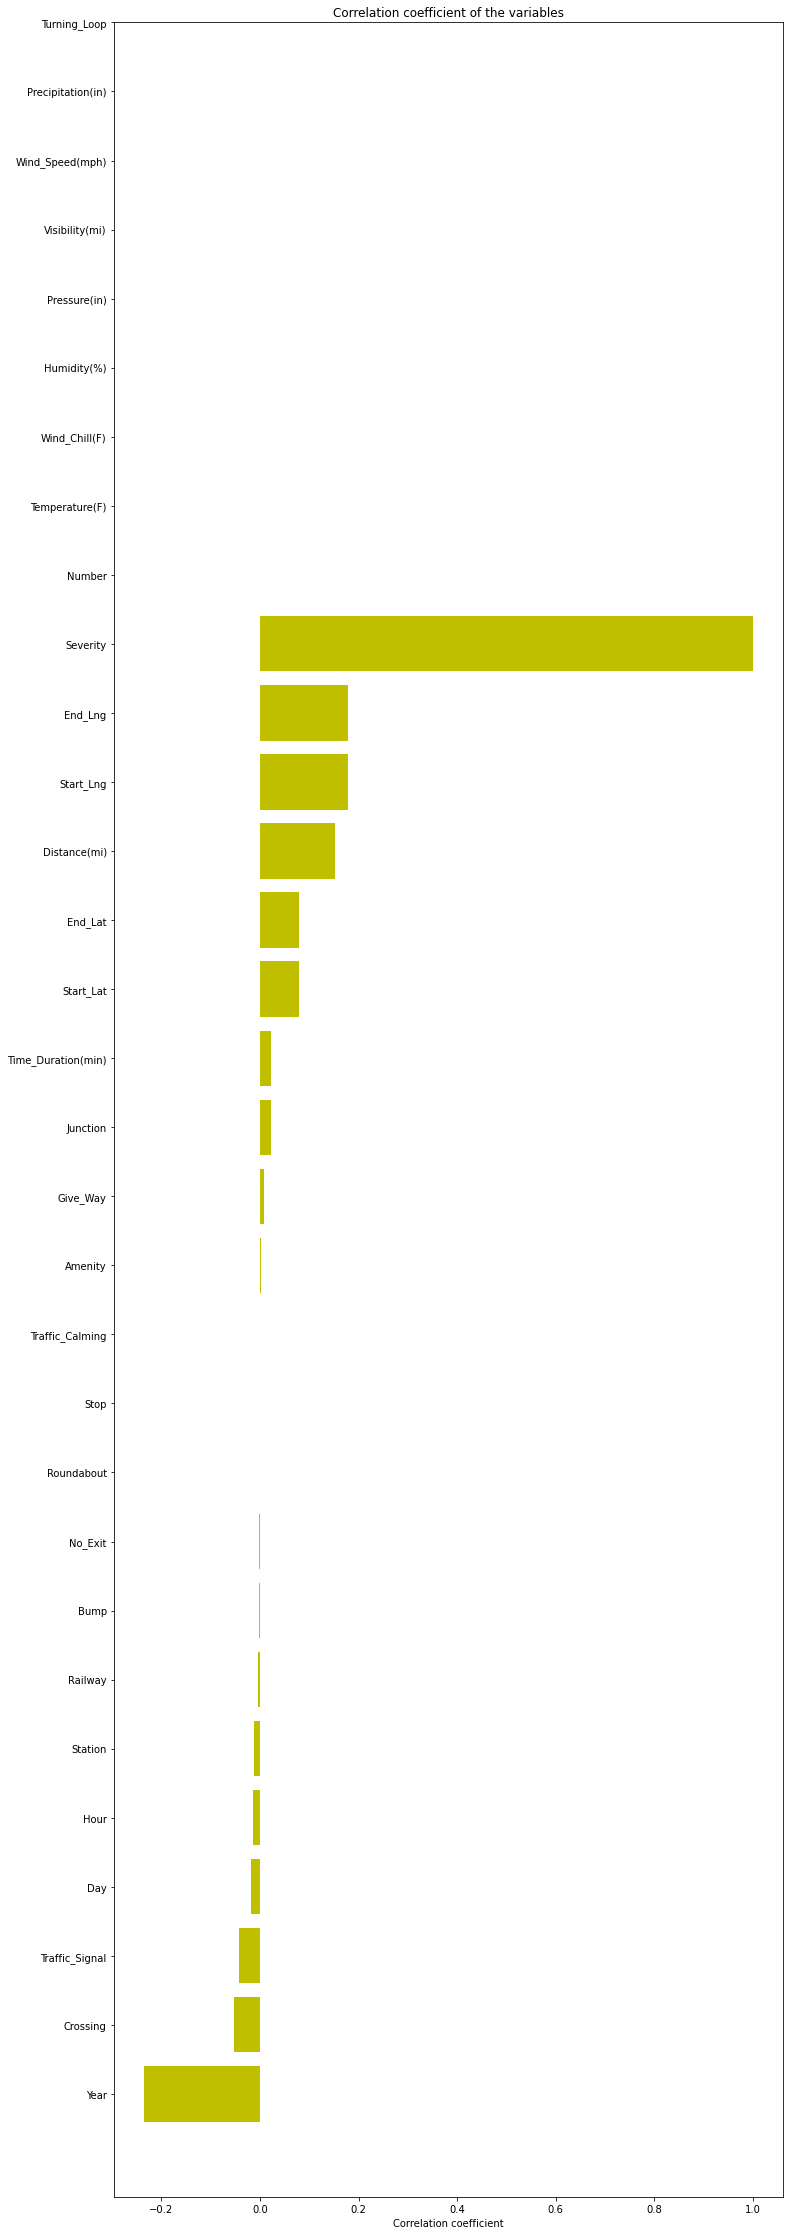

In [ ]:
#Finding the correlation of float features with the target variable to determine how they are related to eachother
x_cols = [col for col in df.columns if col not in df['Severity'] if df[col].dtype == 'float64']

labels = [ ]
values = [ ]
for col in x_cols:
  labels.append(col)
  values.append(np.corrcoef(df[col].values, df.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

Results:
- The correlation of the target variable with the given set of variables are low overall.
- There are some variable with no correlation

In [ ]:
#Getting highly correlated columns
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
#print(corr_df_sel)
print(corr_df_sel.sort_values(by='corr_values', ascending = False))

      col_labels  corr_values
0       Severity     1.000000
4        End_Lng     0.179495
2      Start_Lng     0.179492
5   Distance(mi)     0.152869
3        End_Lat     0.078729
1      Start_Lat     0.078723
16      Crossing    -0.053573
27          Year    -0.235179


SO, The target value(Severity) is mostly positively affected by End_Lng & Start_Lng & Distance(mi) & End_Lat & Start_Lat , and is mostly negatively affected by crossing & the year.


***Insights:***    
- New York city is not included in this data.
- California has the highest number of yearly accidents.
- only 26.5% of cities have more than 3940 per year
- Most of the accidents occure when weather state is Fair. This is wierd!
- Los Angele city has the highest number of yearly accidents.
- There are 1167 cities that have only one accident per year.
- The heighest number of the accidents occur between 1pm to 6pm, then from 6am to 9am.
- In Saturday and Sunday, The accidents are recorded during the whole day(may be the reason is traffic congestion over the weekends), unlike weekdays.
- The heighest number of accidents is recorded in 2020, but this is not an accurate result for years as there is missing data in 2016 and 2020
- The target value(Severity) is mostly positively affected by End_Lng & Start_Lng & Distance(mi) & End_Lat & Start_Lat , and is mostly negatively affected by crossing & the year.